In [1]:
import copy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

## 数据总览

In [2]:
alzheimer_DataFrame = pd.read_csv('dataset/alzheimer/Alzheimer Disease and Healthy Aging Data In US.csv', low_memory=False)
print(alzheimer_DataFrame.columns, alzheimer_DataFrame.shape)

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'DataValueTypeID',
       'Data_Value_Type', 'Data_Value', 'Data_Value_Alt',
       'Low_Confidence_Limit', 'High_Confidence_Limit', 'Sample_Size',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'Geolocation', 'ClassID', 'TopicID', 'QuestionID',
       'LocationID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2'],
      dtype='object') (214462, 29)


In [3]:
alzheimer_DataFrame.head(100)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,2020,2020,HI,Hawaii,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,5064,OVERALL,OVERALL
1,2017,2017,ID,Idaho,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C05,TMC03,Q27,16,AGE,5064,OVERALL,OVERALL
2,2017,2017,ID,Idaho,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C01,TOC11,Q43,16,AGE,5064,OVERALL,OVERALL
3,2018,2018,ID,Idaho,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,...,NaN,POINT (-114.36373 43.68263001),C01,TOC01,Q08,16,AGE,5064,OVERALL,OVERALL
4,2020,2020,IN,Indiana,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,Male,POINT (-86.14996019 39.76691045),C05,TMC03,Q27,18,AGE,AGE_OVERALL,GENDER,MALE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2018,2018,AZ,Arizona,BRFSS,Overall Health,Oral health: tooth retention,Percentage of older adults who report having l...,%,PRCTG,...,Asian/Pacific Islander,POINT (-111.7638113 34.86597028),C01,TOC05,Q07,4,AGE,AGE_OVERALL,RACE,ASN
96,2017,2017,AK,Alaska,BRFSS,Caregiving,Provide care for a friend or family member in ...,Percentage of older adults who provided care f...,%,PRCTG,...,"Black, non-Hispanic",POINT (-147.722059 64.84507996),C07,TGC01,Q36,2,AGE,AGE_OVERALL,RACE,BLK
97,2017,2017,AZ,Arizona,BRFSS,Screenings and Vaccines,Diabetes screening within past 3 years,Percentage of older adults without diabetes wh...,%,PRCTG,...,NaN,POINT (-111.7638113 34.86597028),C03,TSC04,Q19,4,AGE,5064,OVERALL,OVERALL
98,2015,2015,AK,Alaska,BRFSS,Screenings and Vaccines,Cholesterol checked in past 5 years,Percentage of older adults who had a cholester...,%,PRCTG,...,Female,POINT (-147.722059 64.84507996),C03,TSC06,Q14,2,AGE,AGE_OVERALL,GENDER,FEMALE


展示每个属性的数据类型, 不同取值的个数和缺失值的个数

In [4]:
_values, _columns = [], []
for column in alzheimer_DataFrame:
    _columns.append(column)
    _value = []
    _value.append(alzheimer_DataFrame[column].dtype)
    _value.append(alzheimer_DataFrame[column].nunique())
    _value.append(alzheimer_DataFrame[column].isna().sum())
    _values.append(_value)
pd.DataFrame(data=_values, index=_columns, columns=['dataType', 'number of unique values', 'number of missed values'])

,dataType,number of unique values,number of missed values
YearStart,int64,6,0
YearEnd,int64,6,0
LocationAbbr,object,59,0
LocationDesc,object,59,0
Datasource,object,1,0
Class,object,7,0
Topic,object,39,0
Question,object,39,0
Data_Value_Unit,object,2,0
DataValueTypeID,object,2,0


Sample_Size 全是 nan，将其删去，并将 Low_Confidence_Limit 和 High_Confidence_Limit 类型设置为 float64

In [5]:
del alzheimer_DataFrame["Sample_Size"]
for col in 'Low_Confidence_Limit', 'High_Confidence_Limit':
    mask = alzheimer_DataFrame[col] == '.'
    col_data = alzheimer_DataFrame[col].values
    col_data[mask] = '0'
    alzheimer_DataFrame[col] = col_data
    alzheimer_DataFrame[col] = alzheimer_DataFrame[col].astype('float')
alzheimer_DataFrame.shape

(214462, 28)

将数据集中的重复记录删除

In [6]:
print(alzheimer_DataFrame.shape)
alzheimer_DataFrame = alzheimer_DataFrame.drop_duplicates()
alzheimer_DataFrame.shape

(214462, 28)


(214462, 28)

In [7]:
_values, _columns = [], []
for column in alzheimer_DataFrame:
    _columns.append(column)
    _value = []
    _value.append(alzheimer_DataFrame[column].dtype)
    _value.append(alzheimer_DataFrame[column].nunique())
    _value.append(alzheimer_DataFrame[column].isna().sum())
    _values.append(_value)
pd.DataFrame(data=_values, index=_columns, columns=['dataType', 'number of unique values', 'number of missed values'])

,dataType,number of unique values,number of missed values
YearStart,int64,6,0
YearEnd,int64,6,0
LocationAbbr,object,59,0
LocationDesc,object,59,0
Datasource,object,1,0
Class,object,7,0
Topic,object,39,0
Question,object,39,0
Data_Value_Unit,object,2,0
DataValueTypeID,object,2,0


## 数据摘要
### 标称属性

In [8]:
attributes = []
for column in alzheimer_DataFrame.columns:
    if alzheimer_DataFrame[column].dtype == object:
        attributes.append(column)
for attribute in attributes:
    print(f'标称属性 {attribute} 所有可能取值的频数:')
    print(alzheimer_DataFrame[attribute].value_counts())
    print('-----------------------------------------')

标称属性 LocationAbbr 所有可能取值的频数:
LocationAbbr
US      4644
WEST    4638
NRE     4614
MDW     4611
OR      4565
NY      4557
SOU     4542
UT      4222
OH      3955
GA      3951
MD      3919
HI      3907
TN      3879
MI      3796
VA      3758
FL      3753
ME      3733
TX      3699
NV      3696
DC      3684
WV      3682
MS      3677
PA      3648
NM      3635
AL      3633
KY      3623
AK      3611
SC      3592
NJ      3589
AZ      3582
MO      3573
IL      3571
IN      3570
WI      3569
LA      3563
MN      3555
NE      3546
CT      3543
RI      3534
OK      3526
SD      3526
ND      3514
KS      3510
ID      3507
IA      3501
AR      3498
WY      3494
CA      3447
CO      3390
NC      3349
WA      3348
MT      3348
DE      3346
NH      3284
VT      3278
MA      3174
PR      2797
GU      2703
VI       503
Name: count, dtype: int64
-----------------------------------------
标称属性 LocationDesc 所有可能取值的频数:
LocationDesc
United States, DC & Territories    4644
West                               4638
N

### 数值属性

In [9]:
attributes = []
for column in alzheimer_DataFrame.columns:
    if alzheimer_DataFrame[column].dtype != object:
        attributes.append(column)
for attribute in attributes:
    print(f'数值属性 {attribute} 的五数概括:')
    print(alzheimer_DataFrame[attribute].describe().loc[['min', '25%', '50%', '75%', 'max']])
    print('-----------------------------------------')
print('各数值属性缺失值的个数如下表：')
_missingValueNum = []
for attribute in attributes:
    _missingValueNum.append(alzheimer_DataFrame[attribute].isna().sum())
pd.DataFrame(data=[_missingValueNum], index=['number of missing value'], columns=attributes)

数值属性 YearStart 的五数概括:
min    2015.0
25%    2016.0
50%    2017.0
75%    2019.0
max    2020.0
Name: YearStart, dtype: float64
-----------------------------------------
数值属性 YearEnd 的五数概括:
min    2015.0
25%    2016.0
50%    2018.0
75%    2019.0
max    2020.0
Name: YearEnd, dtype: float64
-----------------------------------------
数值属性 Data_Value 的五数概括:
min      0.0
25%     15.3
50%     32.5
75%     56.8
max    100.0
Name: Data_Value, dtype: float64
-----------------------------------------
数值属性 Data_Value_Alt 的五数概括:
min      0.0
25%     15.3
50%     32.5
75%     56.8
max    100.0
Name: Data_Value_Alt, dtype: float64
-----------------------------------------
数值属性 Low_Confidence_Limit 的五数概括:
min     0.0
25%    12.0
50%    26.9
75%    49.1
max    99.6
Name: Low_Confidence_Limit, dtype: float64
-----------------------------------------
数值属性 High_Confidence_Limit 的五数概括:
min      0.0
25%     19.0
50%     38.5
75%     64.7
max    100.0
Name: High_Confidence_Limit, dtype: float64
-----------------

,YearStart,YearEnd,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit,LocationID
number of missing value,0,0,69833,69833,69990,69990,0


## 数据可视化

### 标称属性直方图

In [10]:
def draw_top10_hist(attr):
    attr_count = pd.DataFrame(alzheimer_DataFrame[attr].value_counts())
    plt.figure(figsize=(5, 5))
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.barh(attr_count.index[:10][::-1], width=attr_count['count'][:10][::-1])
    plt.ylabel(attr, fontsize=15)
    plt.xlabel(f'number of {attr}', fontsize=15)
    plt.title(f"{attr}'s Top {attr_count.index[:10].shape[0]}", fontsize=15, loc='center')
    plt.show()

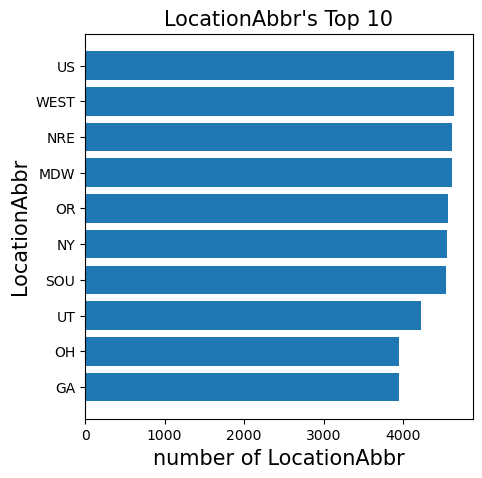

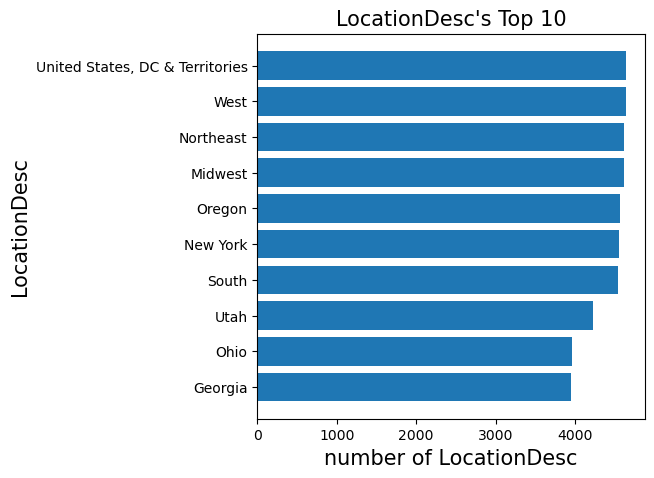

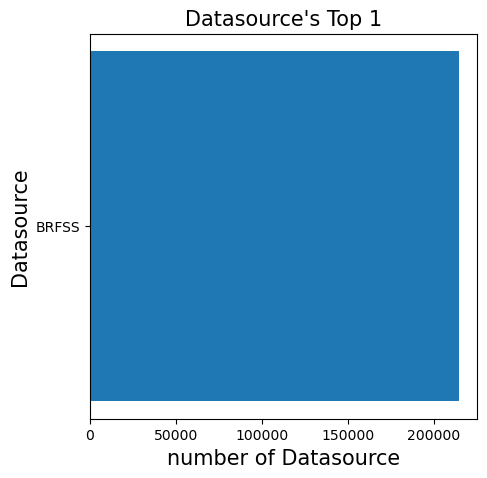

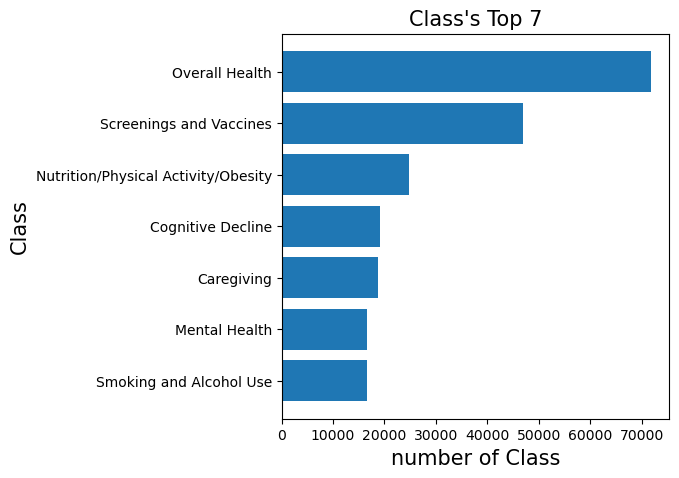

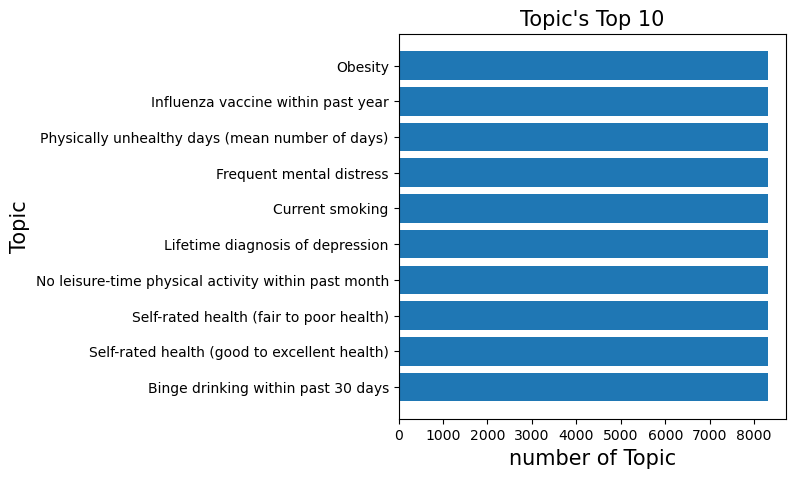

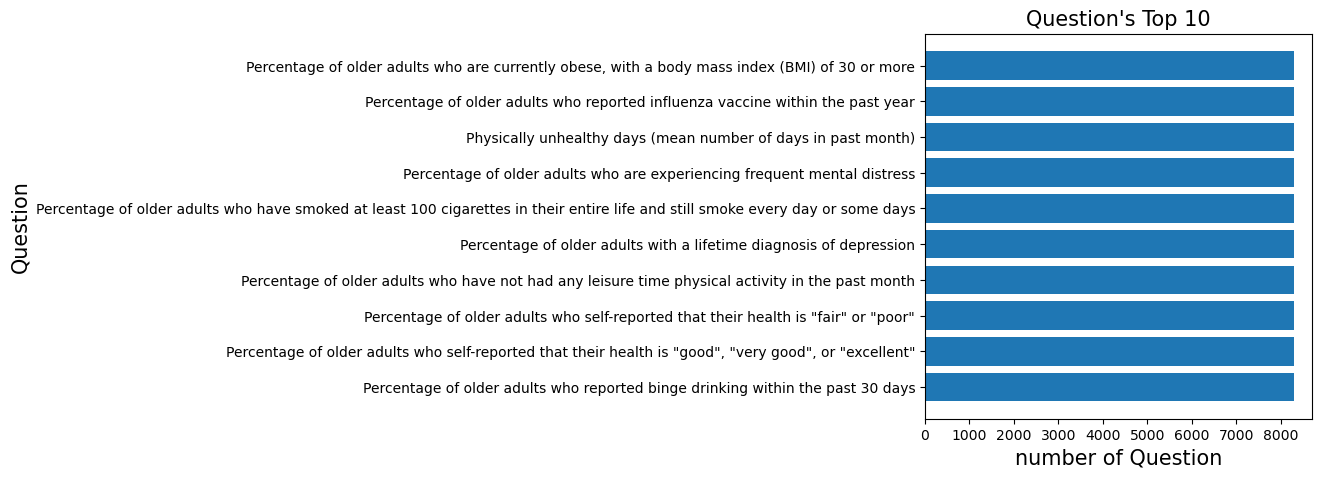

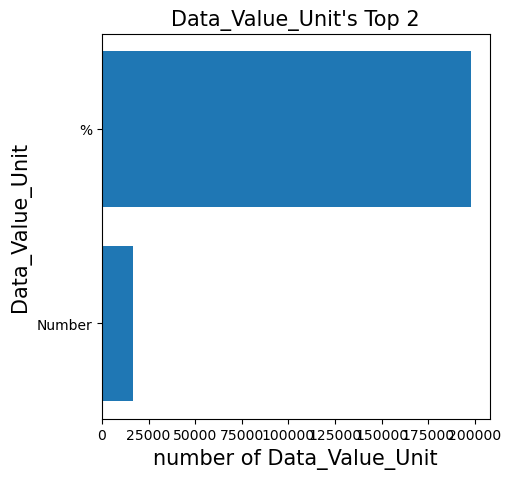

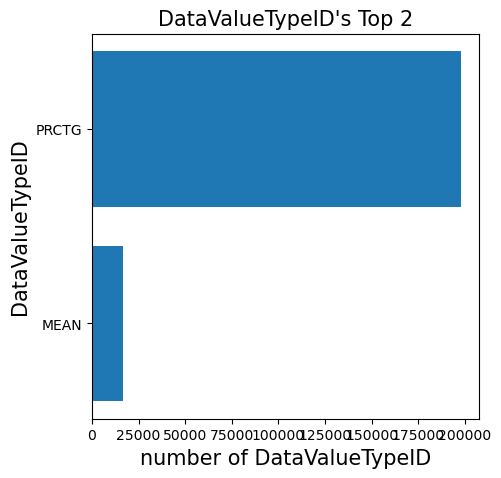

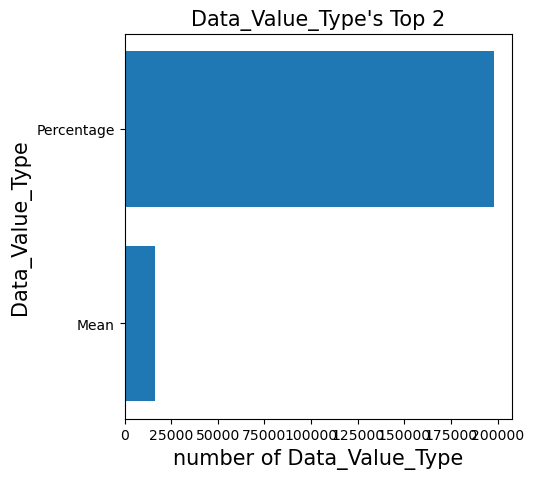

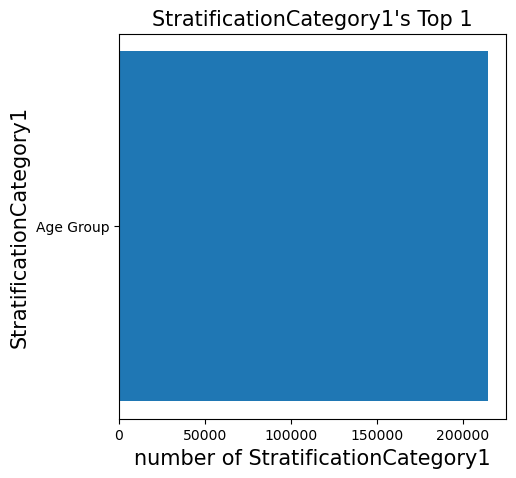

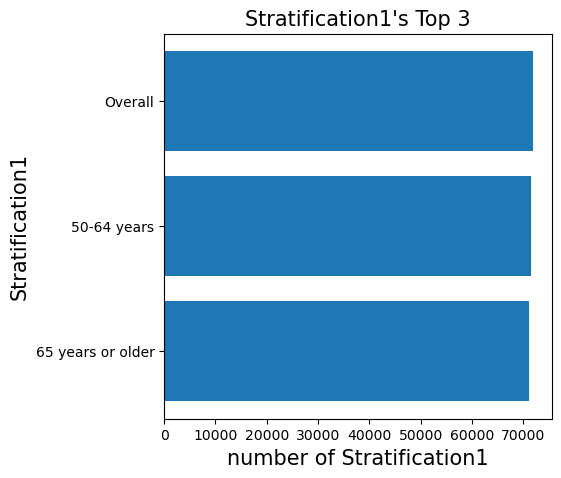

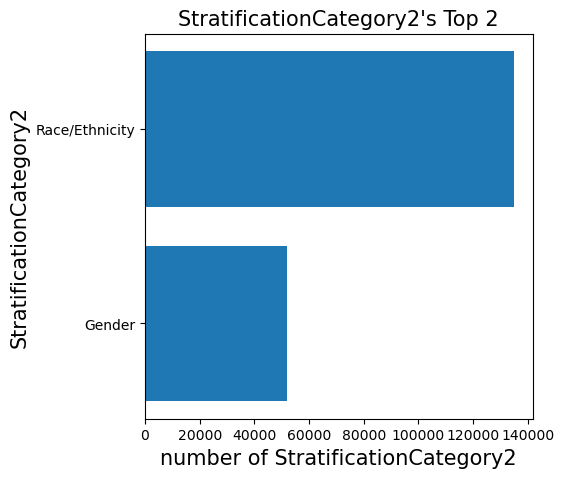

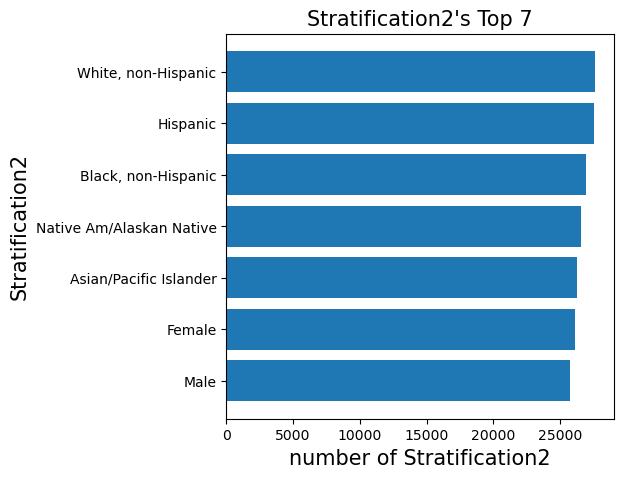

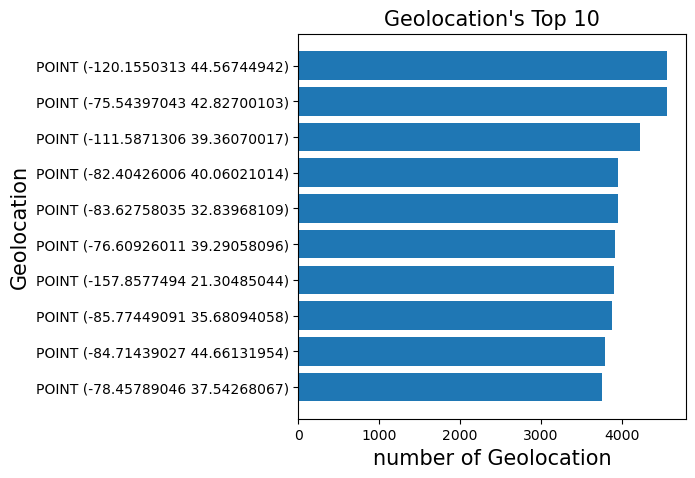

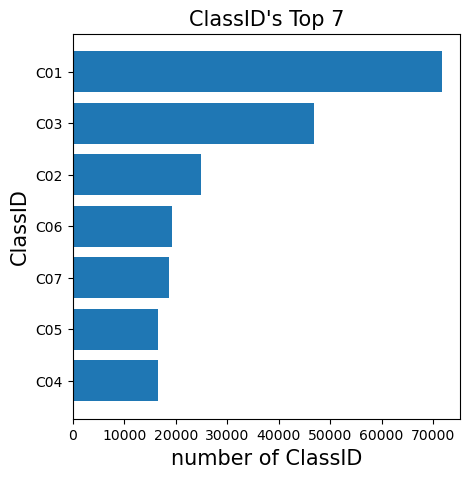

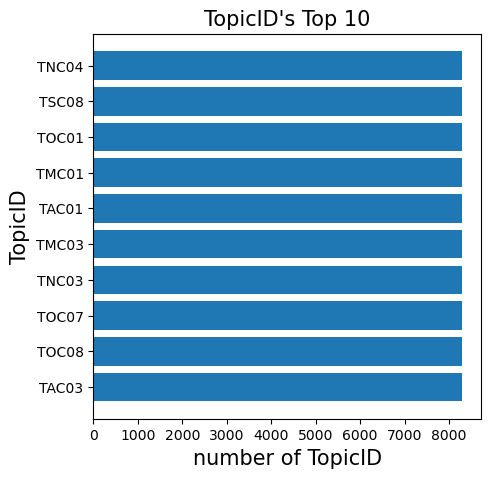

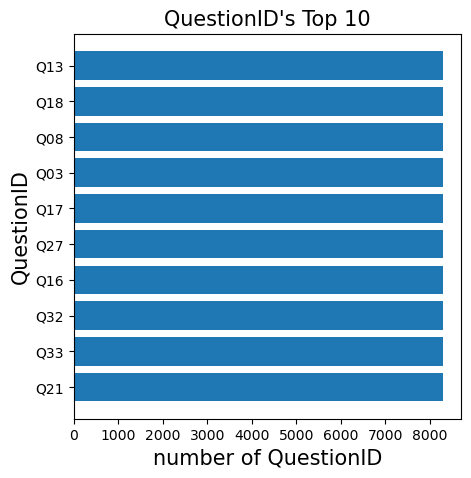

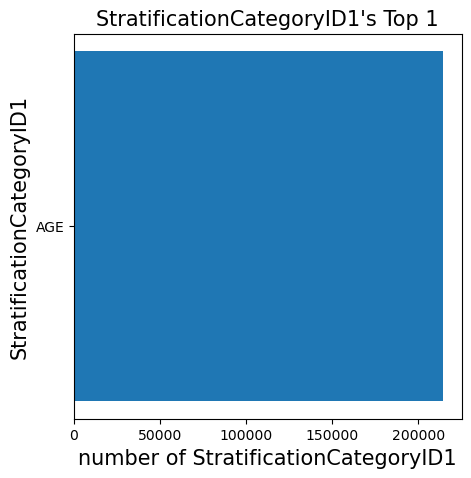

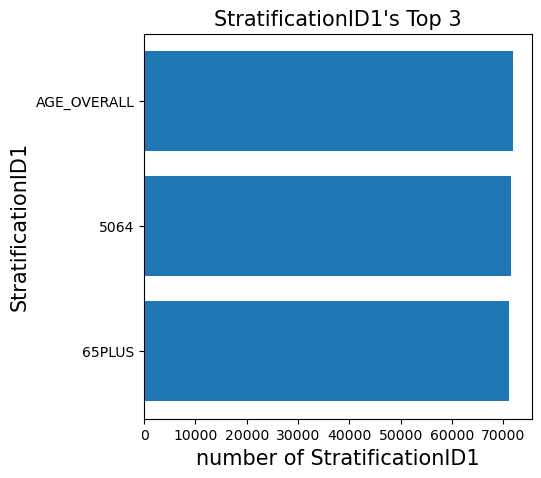

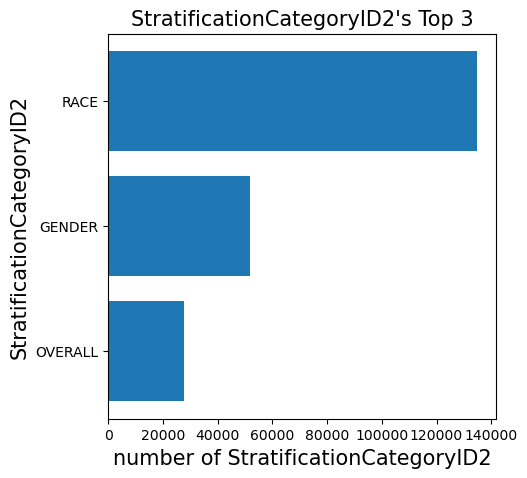

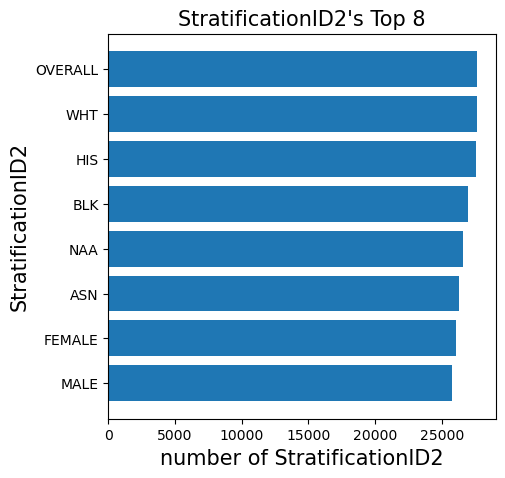

In [11]:
attributes = []
for column in alzheimer_DataFrame.columns:
    if alzheimer_DataFrame[column].dtype == object:
        attributes.append(column)
for attribute in attributes:
    draw_top10_hist(attribute)

### 数值属性直方图

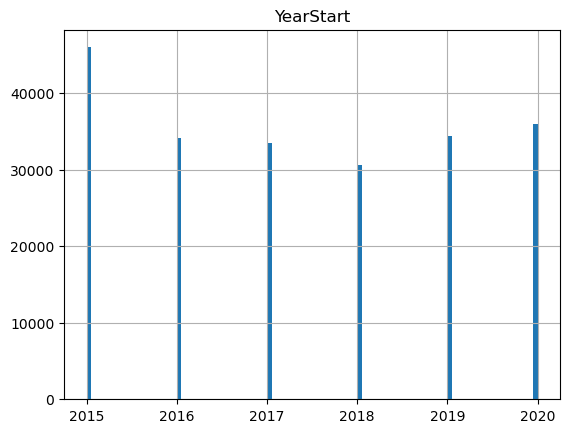

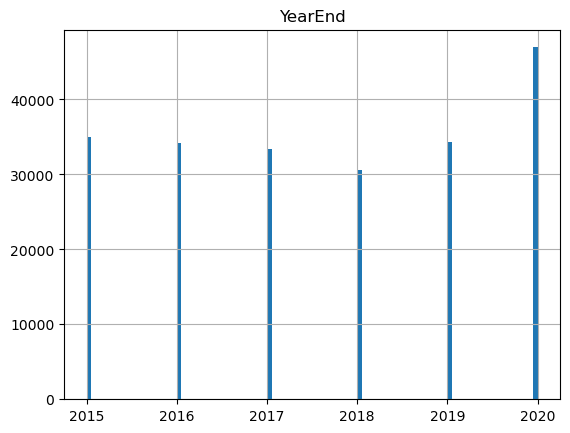

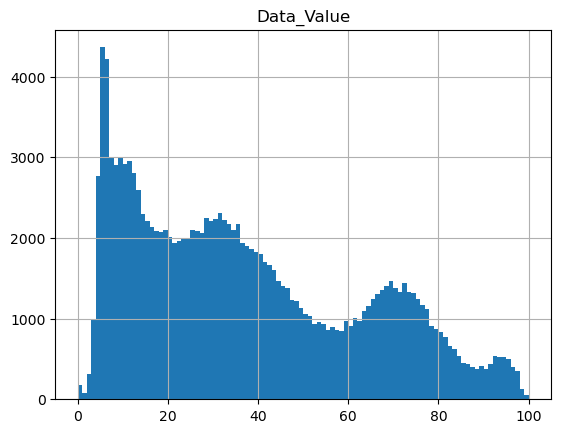

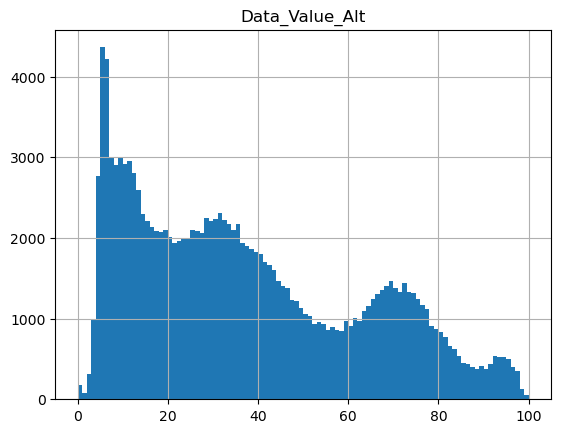

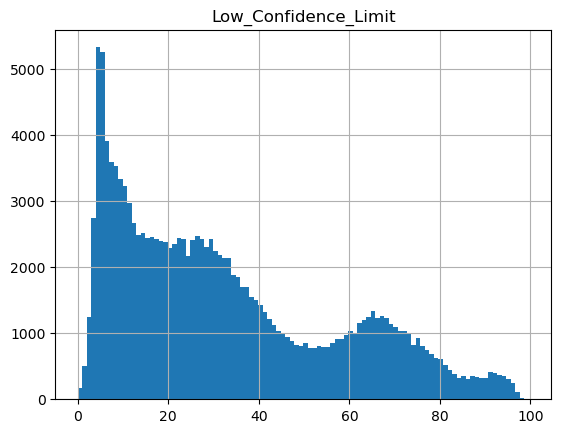

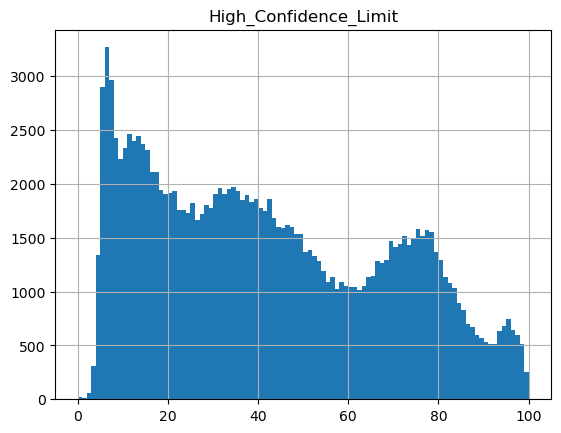

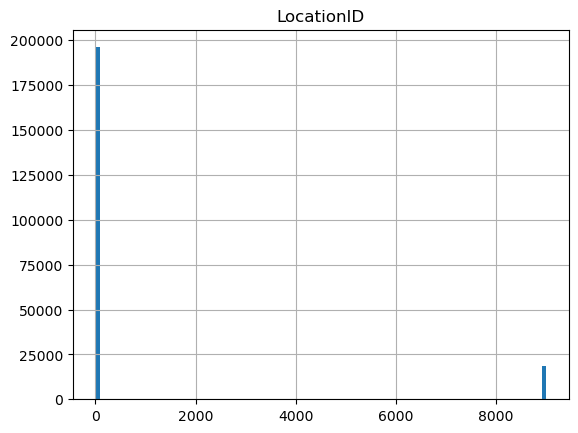

In [12]:
attributes = []
for column in alzheimer_DataFrame.columns:
    if alzheimer_DataFrame[column].dtype != object:
        attributes.append(column)
for attribute in attributes:
    alzheimer_DataFrame.hist(column=attribute, bins=100)

### 数值属性盒图

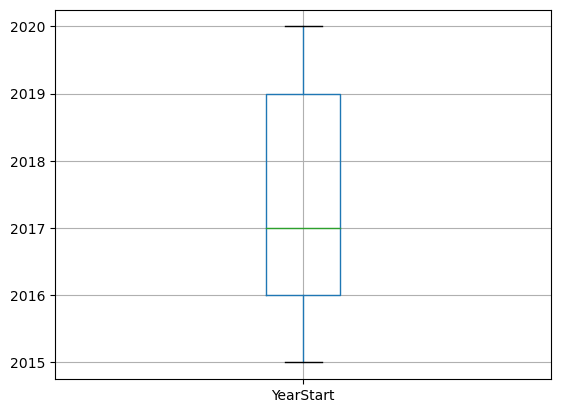

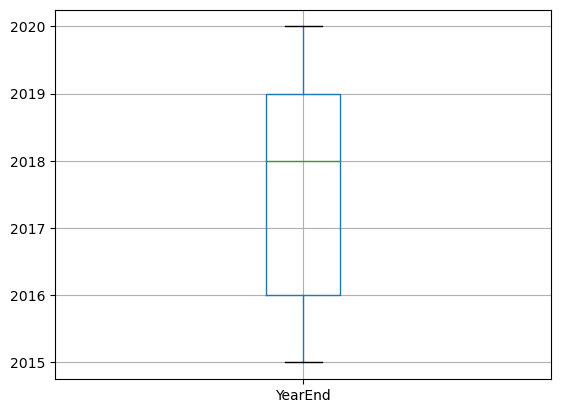

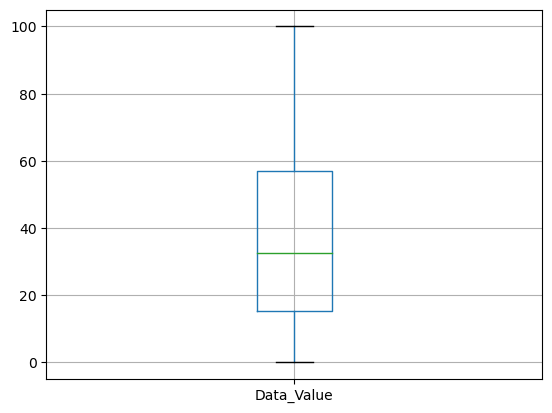

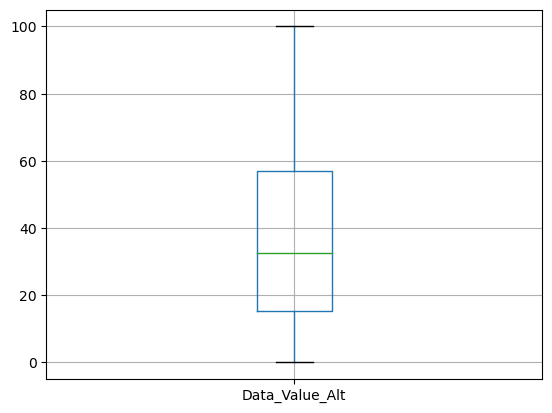

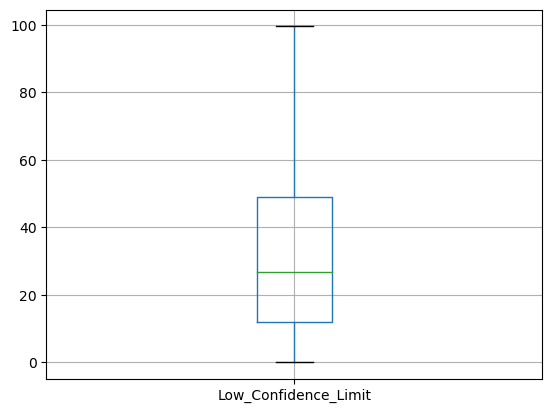

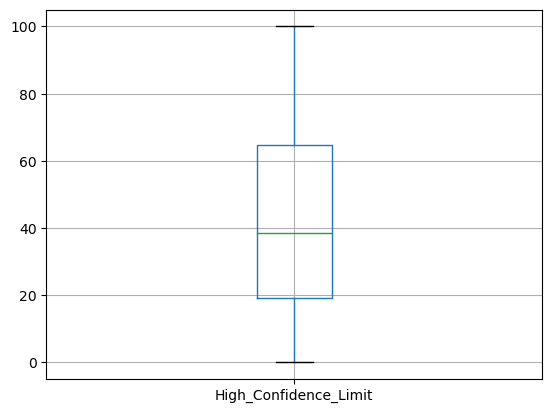

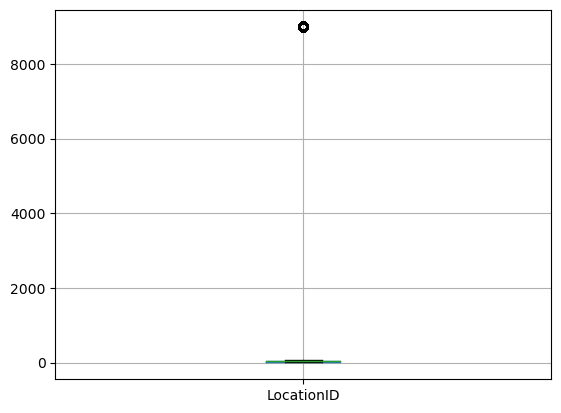

In [13]:
attributes = []
for column in alzheimer_DataFrame.columns:
    if alzheimer_DataFrame[column].dtype != object:
        attributes.append(column)
for attribute in attributes:
    plt.figure()
    alzheimer_DataFrame.boxplot(column=attribute)

## 数据缺失处理

In [14]:
_values, _columns = [], []
for column in alzheimer_DataFrame:
    _columns.append(column)
    _values.append([alzheimer_DataFrame[column].isna().sum()])
pd.DataFrame(data=_values, index=_columns, columns=['number of missed values'])

,number of missed values
YearStart,0
YearEnd,0
LocationAbbr,0
LocationDesc,0
Datasource,0
Class,0
Topic,0
Question,0
Data_Value_Unit,0
DataValueTypeID,0


### 方法一：将缺失部分剔除

In [15]:
cleaned_data_by_remove_nan = alzheimer_DataFrame.dropna()
alzheimer_DataFrame.shape, cleaned_data_by_remove_nan.shape

((214462, 28), (97238, 28))

新旧数据对比

In [16]:
def draw_top10_hist_compare(attr, dataframe_old, dataframe_new):
    attr_count_old = pd.DataFrame(dataframe_old[attr].value_counts())
    attr_count_new = pd.DataFrame(dataframe_new[attr].value_counts())
    selected_attr_count_new = np.zeros(attr_count_old.index[:10].shape, dtype='int')
    selected_attrs = attr_count_old.index[:10][::-1]
    idx = 0
    for selected_attr in selected_attrs:
        if selected_attr in attr_count_new.index:
            selected_attr_count_new[idx] = attr_count_new.loc[selected_attr, 'count']
        idx += 1
    plt.figure(figsize=(5, 5))
    plt.yticks(fontsize=10)
    plt.xticks(fontsize=10)
    plt.barh(list(range(len(attr_count_old.index[:10][::-1]))), height=0.35, tick_label=attr_count_old.index[:10][::-1],
             width=attr_count_old['count'][:10][::-1], label='old_data')
    plt.barh([i + 0.4 for i in range(len(attr_count_old.index[:10][::-1]))], height=0.35,
             tick_label=attr_count_old.index[:10][::-1], width=selected_attr_count_new, label='cleaned_data')
    # plt.barh(attr_count_old.index[:50][::-1], width=selected_attr_count_new, label='cleaned_data')
    plt.legend(fontsize=15, loc='lower right')
    plt.ylabel(attr, fontsize=15)
    plt.xlabel(f'number of {attr}', fontsize=15)
    plt.title(f"{attr}'s Top {attr_count_old['count'][:10].shape[0]}", fontsize=15, loc='center')
    plt.show()

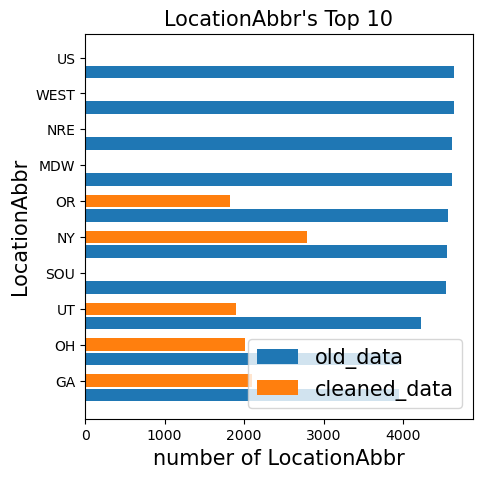

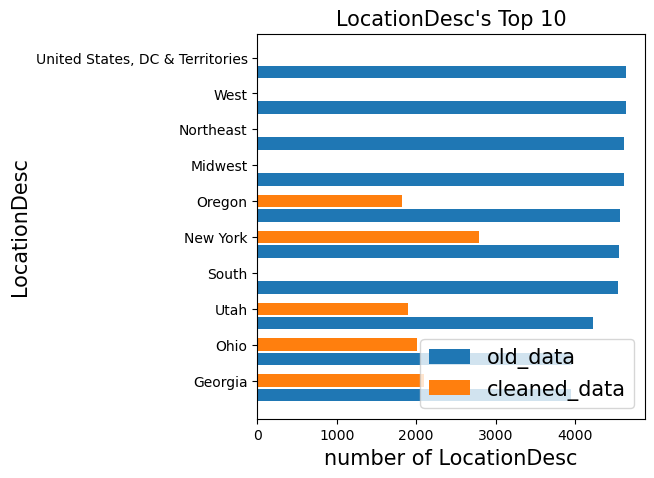

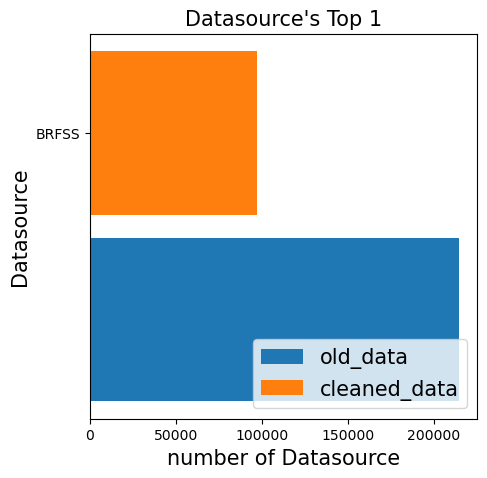

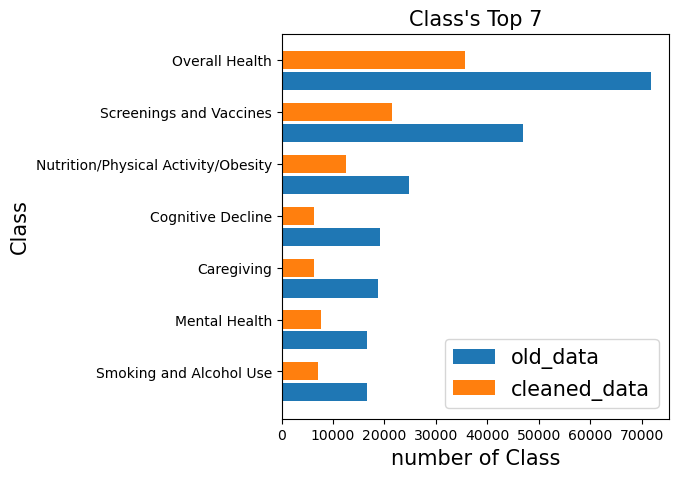

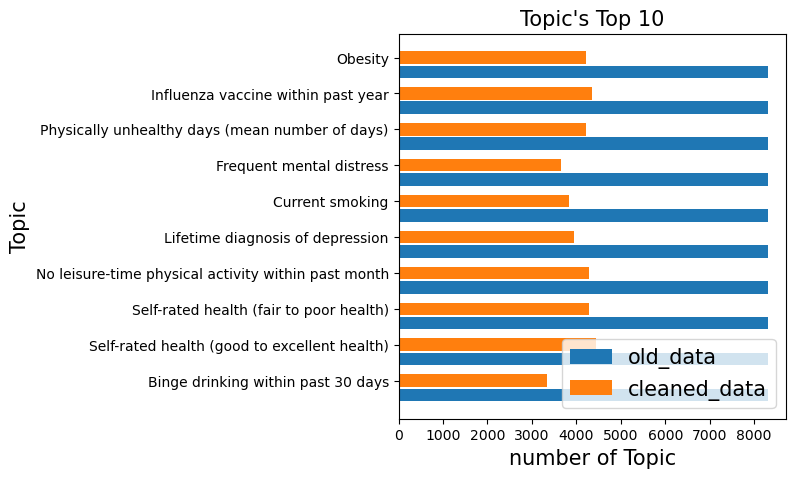

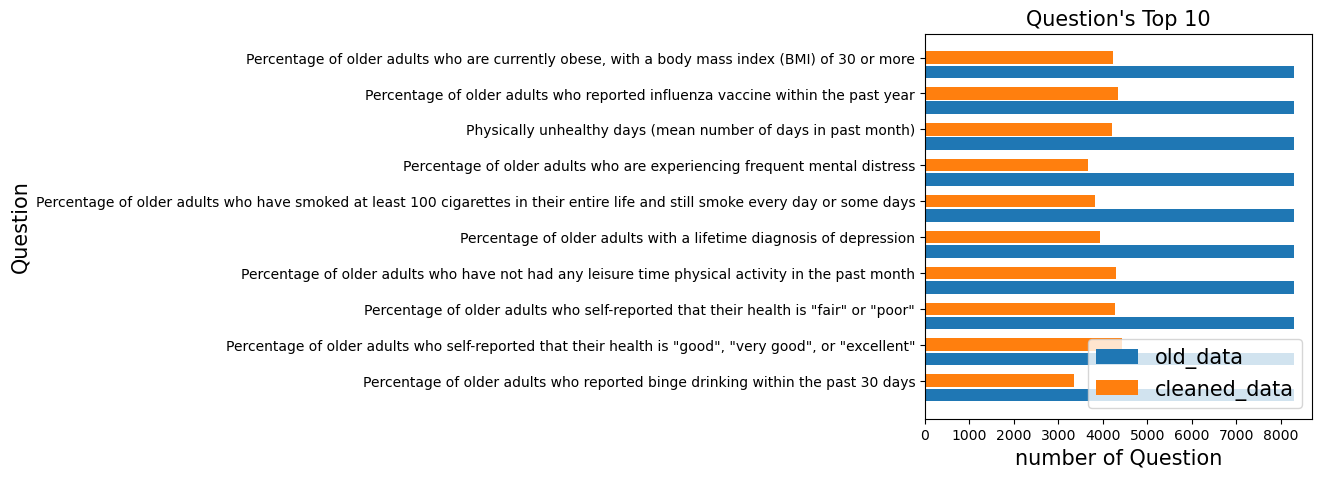

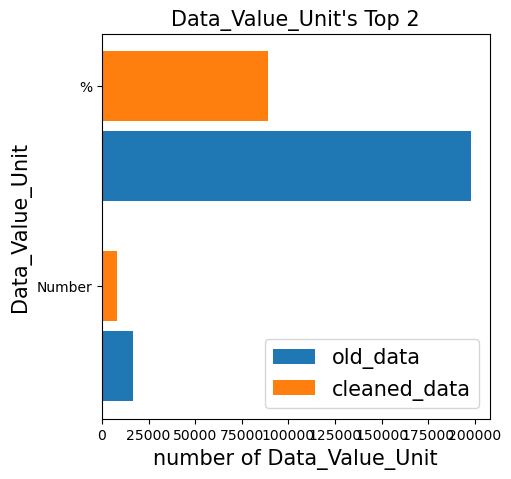

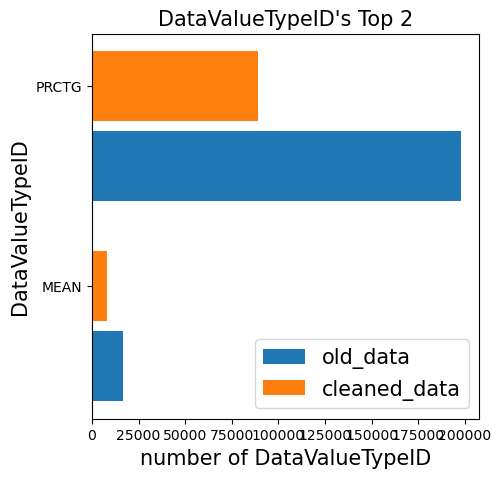

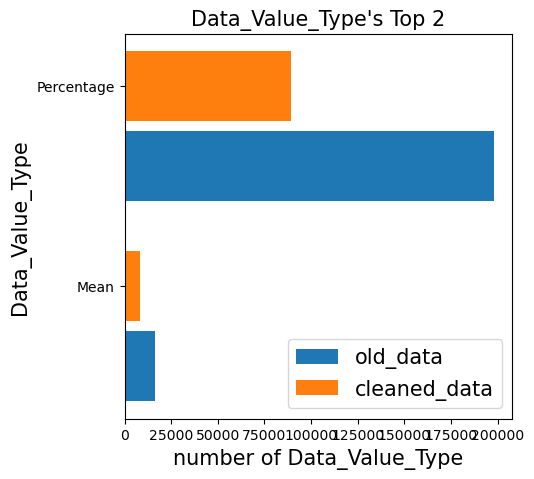

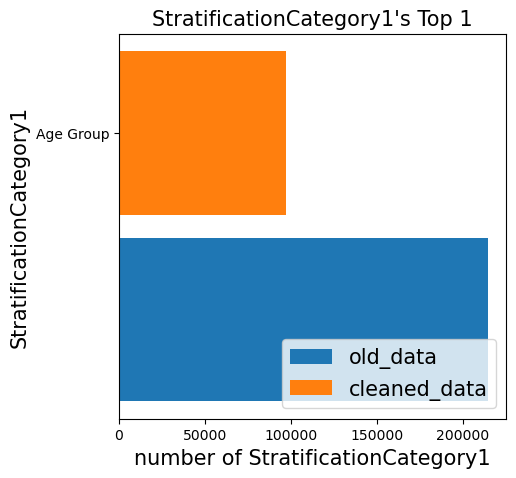

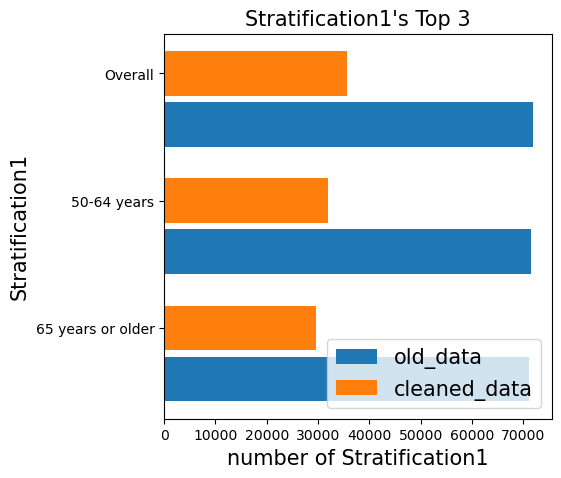

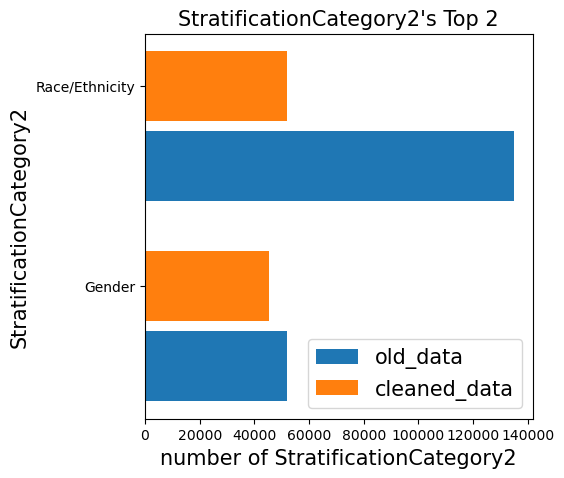

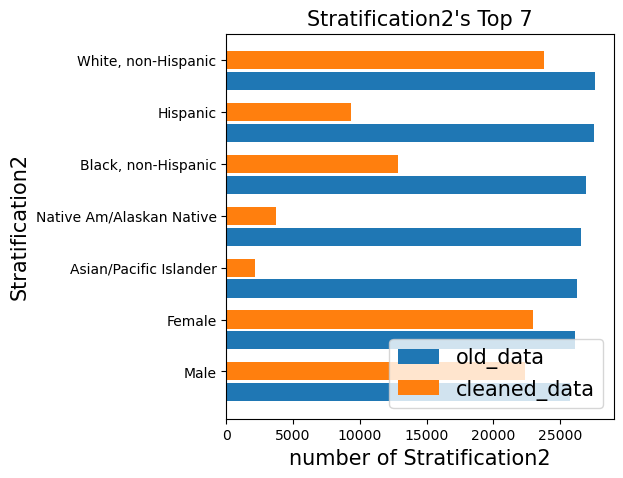

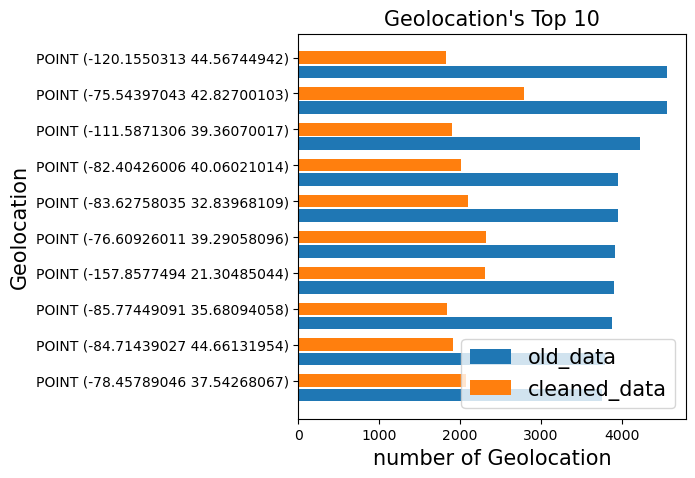

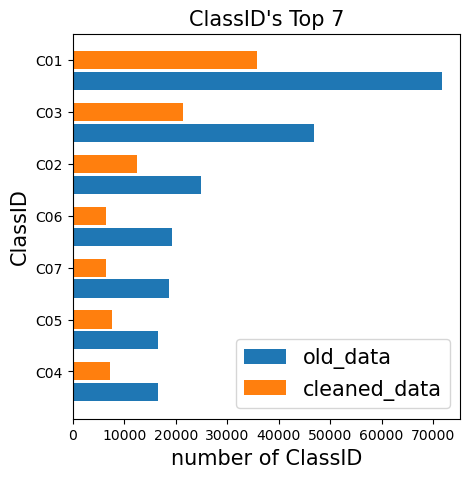

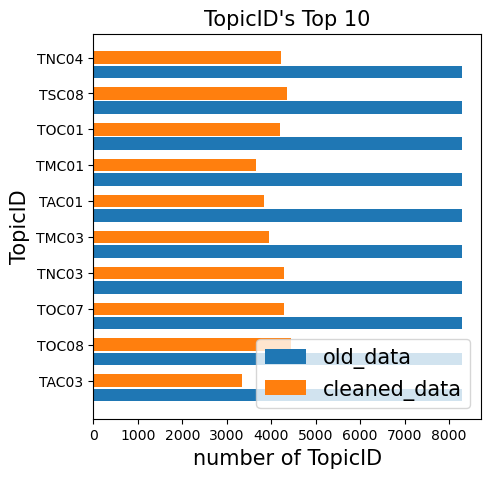

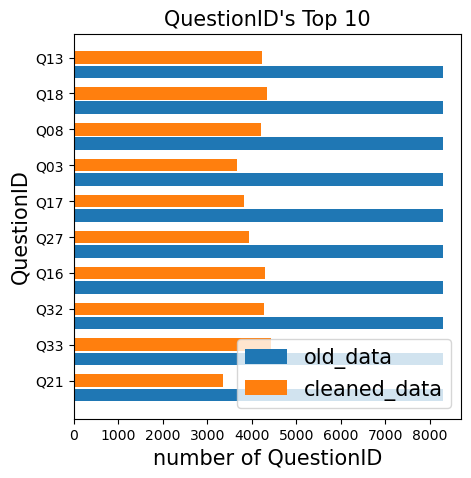

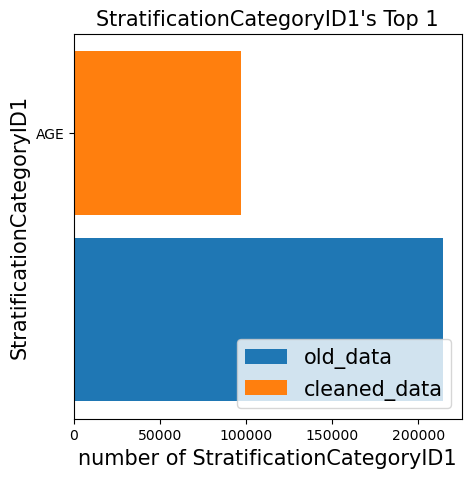

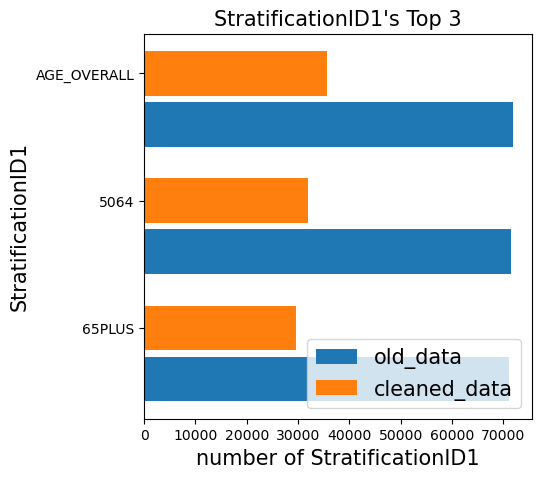

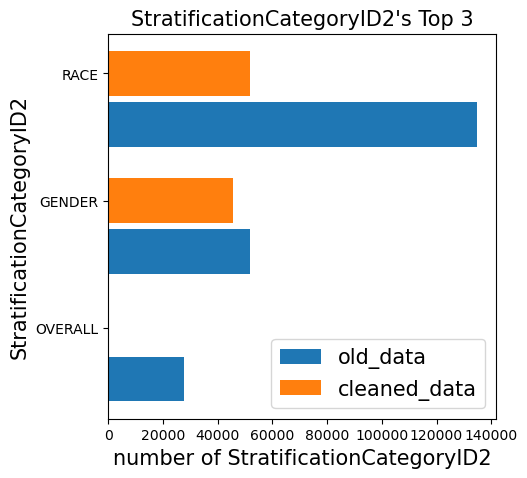

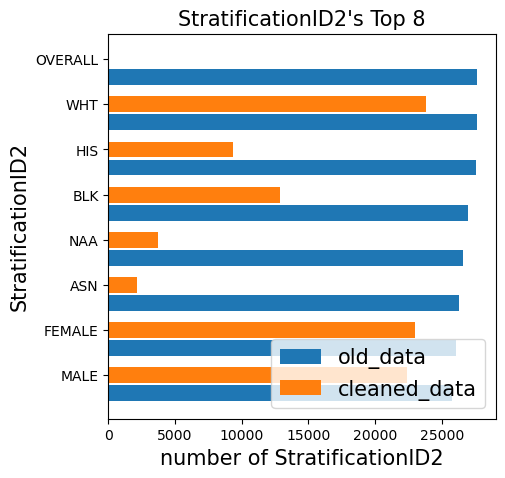

In [17]:
attributes = []
for column in alzheimer_DataFrame.columns:
    if alzheimer_DataFrame[column].dtype == object:
        attributes.append(column)
for attribute in attributes:
    draw_top10_hist_compare(attribute, alzheimer_DataFrame, cleaned_data_by_remove_nan)

可以看到由于缺失值较多，所以简单地剔除缺失部分会对标称属性的分布产生较大影响

### 二、用最高频率值来填补缺失值

In [18]:
missing_value_attrs = alzheimer_DataFrame.columns[np.where(alzheimer_DataFrame.isna().sum() > 0)]
highest_frequency = {}
for attr in missing_value_attrs:
    highest_frequency[attr] = alzheimer_DataFrame[attr].value_counts().index[0]
highest_frequency

{'Data_Value': 6.0,
 'Data_Value_Alt': 6.0,
 'Low_Confidence_Limit': 4.8,
 'High_Confidence_Limit': 6.5,
 'StratificationCategory2': 'Race/Ethnicity',
 'Stratification2': 'White, non-Hispanic',
 'Geolocation': 'POINT (-120.1550313 44.56744942)'}

In [19]:
cleaned_data_by_highest_frequency_value = copy.deepcopy(alzheimer_DataFrame)
for attr in missing_value_attrs:
    cleaned_data_by_highest_frequency_value[attr] = cleaned_data_by_highest_frequency_value[attr].replace(np.nan, highest_frequency[attr])

新旧数据对比

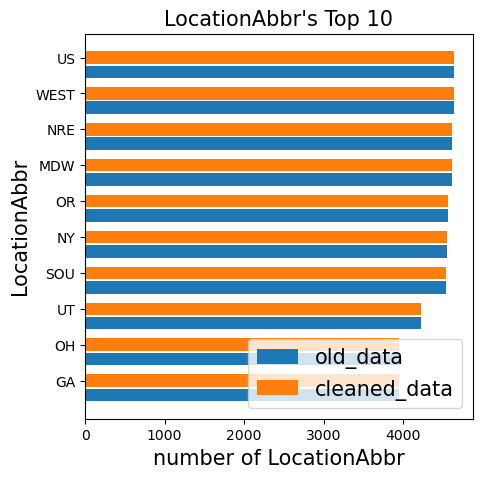

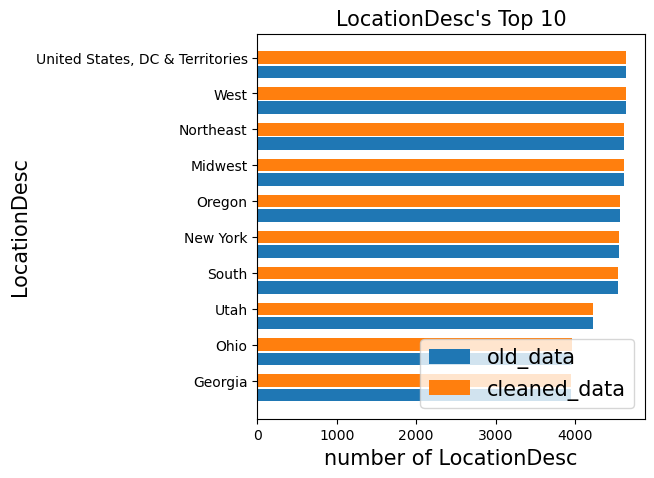

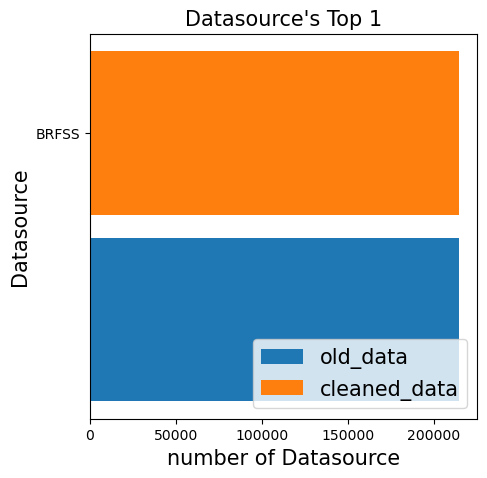

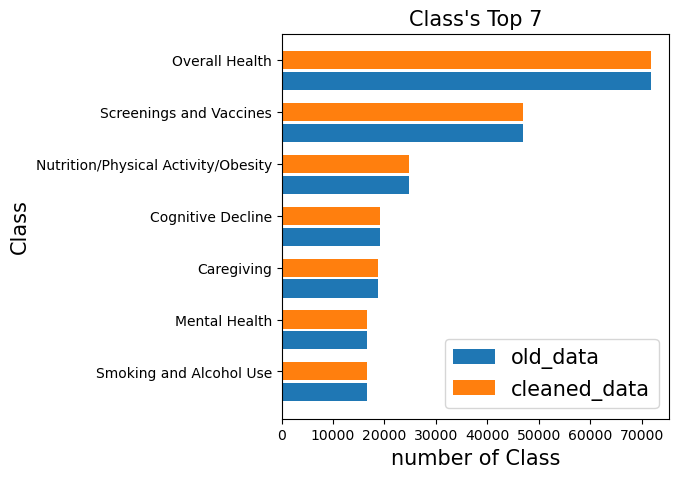

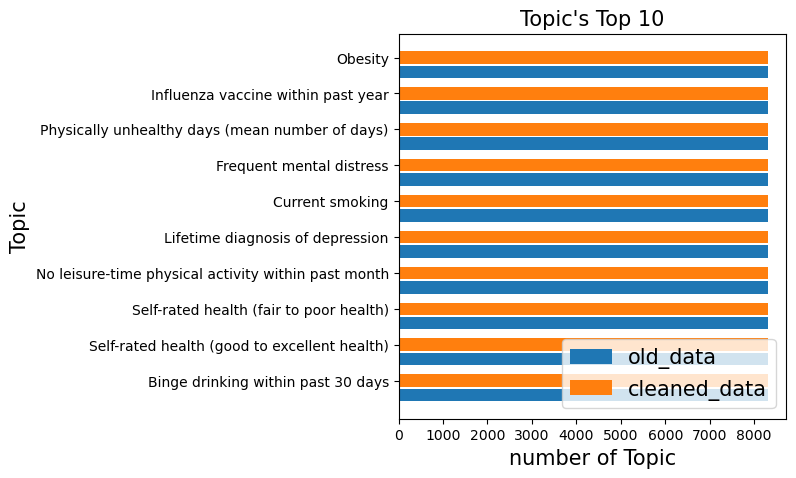

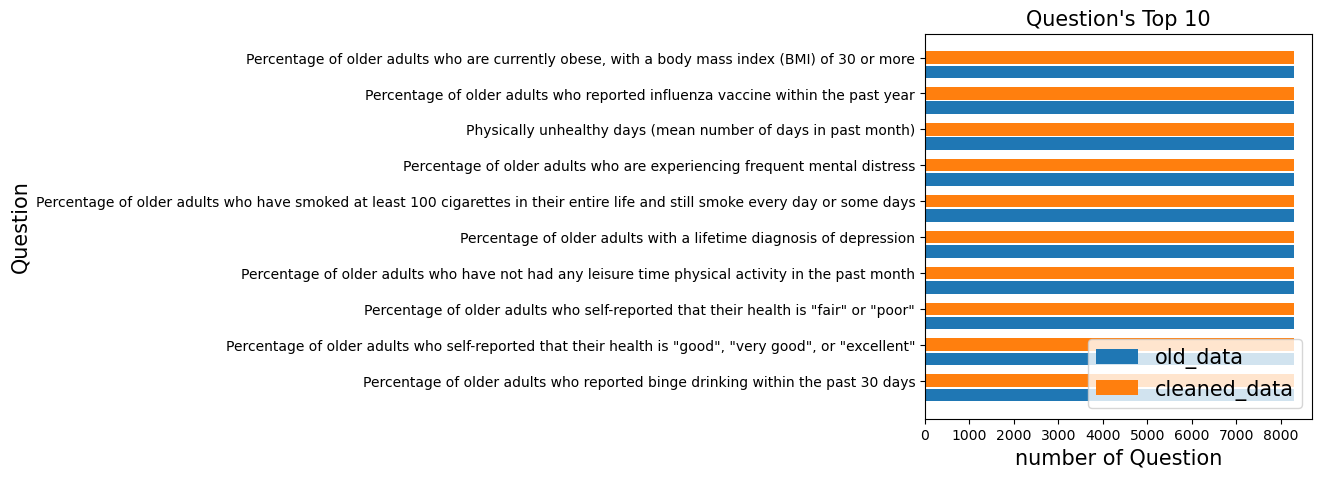

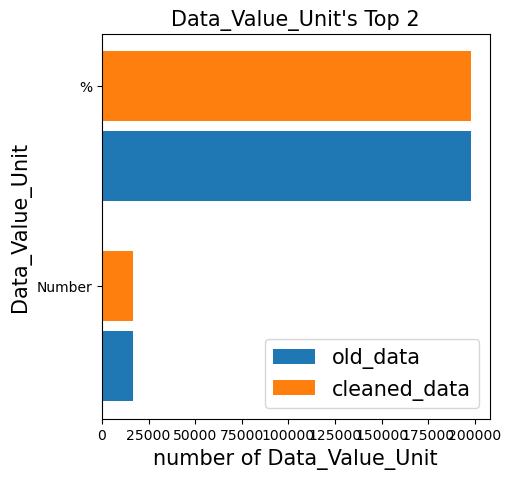

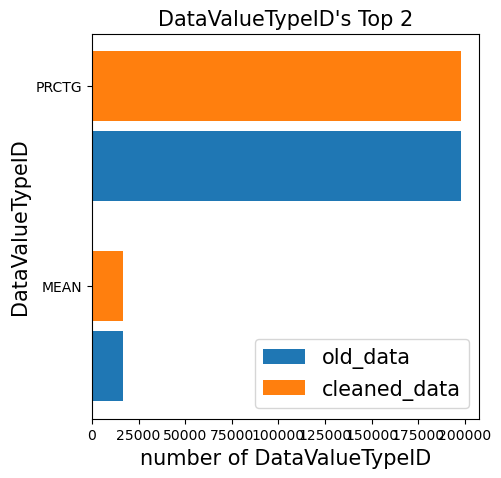

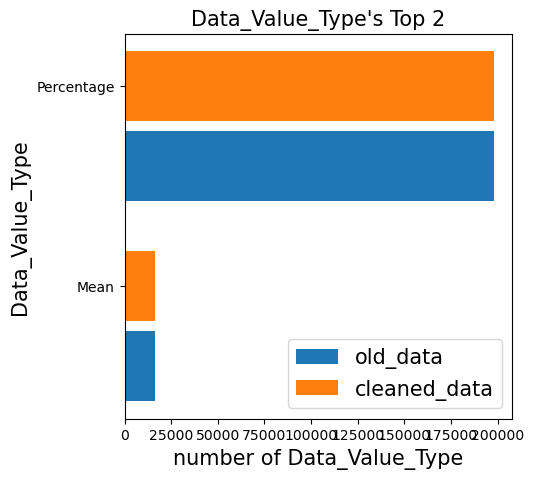

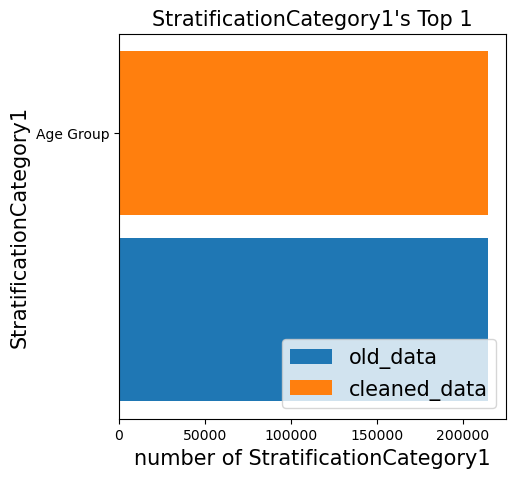

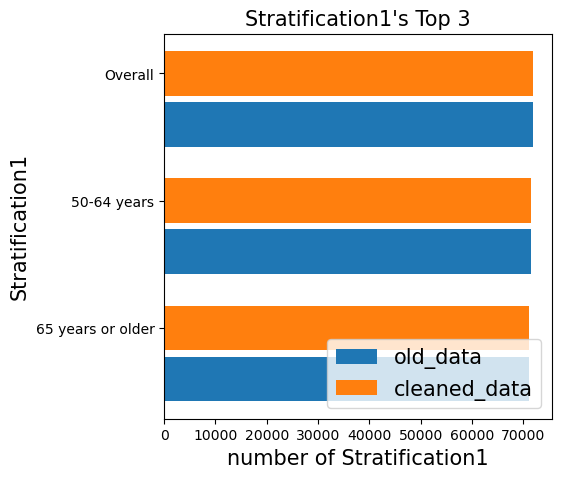

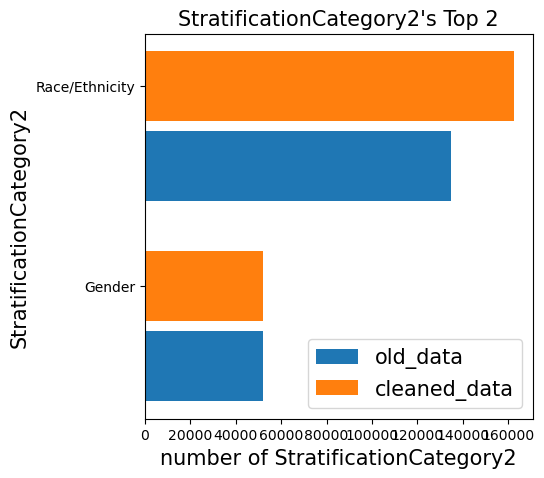

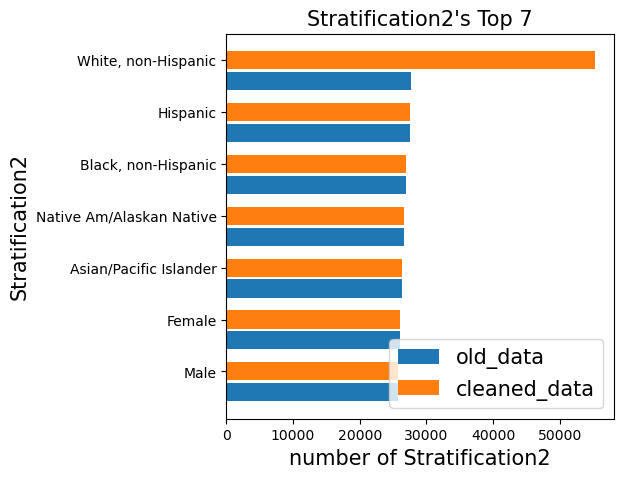

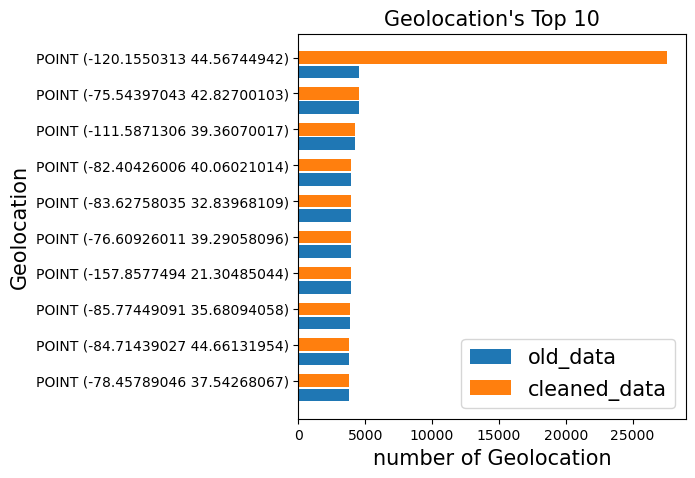

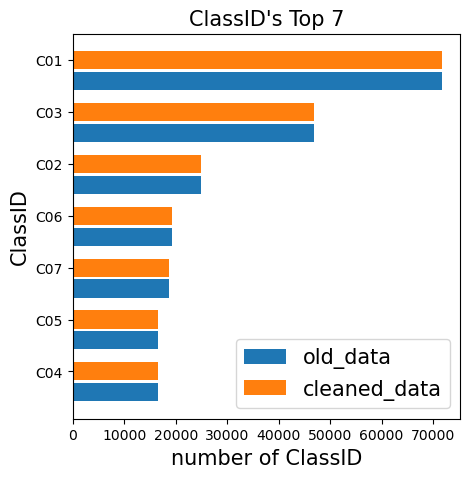

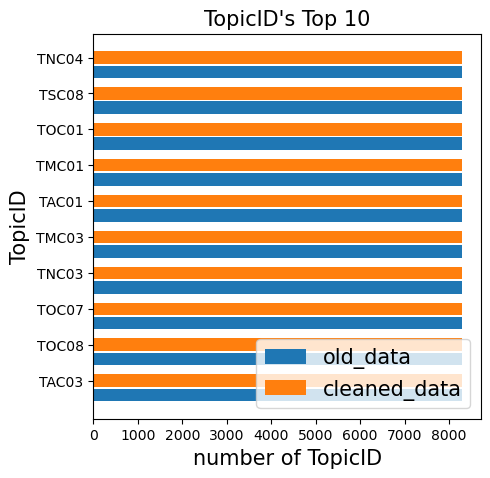

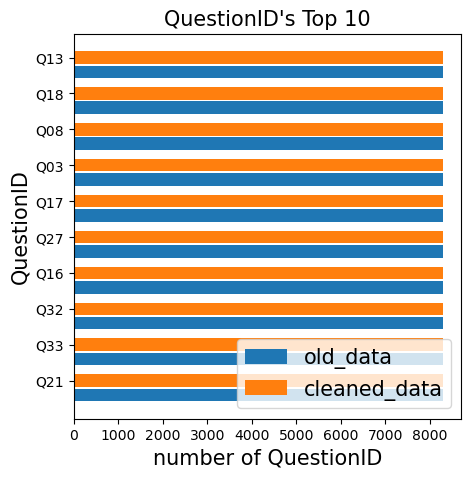

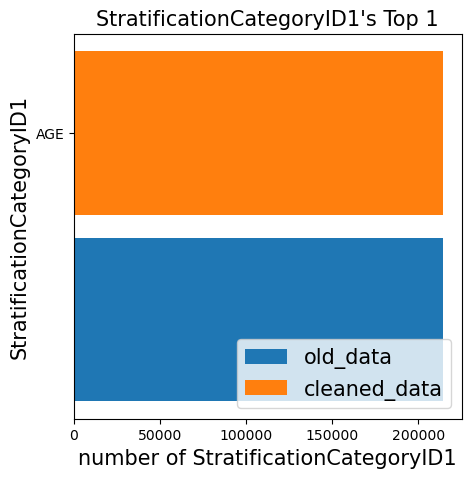

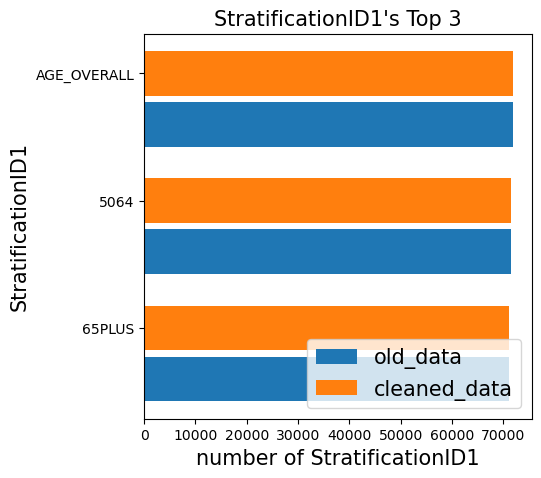

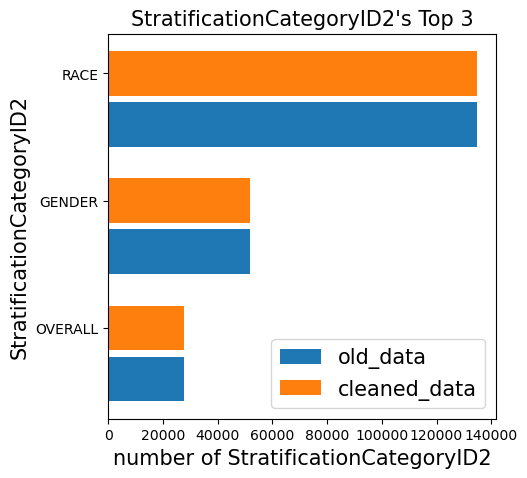

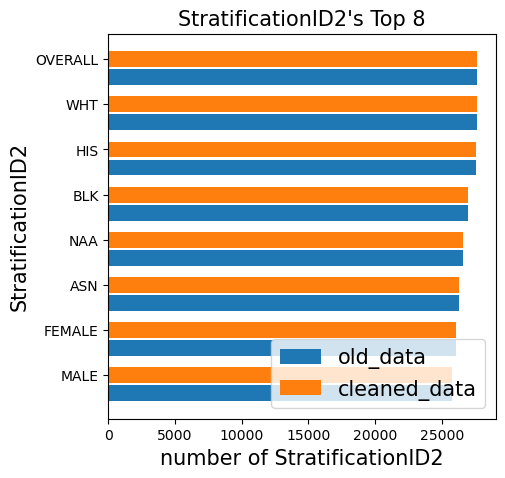

In [20]:
attributes = []
for column in alzheimer_DataFrame.columns:
    if alzheimer_DataFrame[column].dtype == object:
        attributes.append(column)
for attribute in attributes:
    draw_top10_hist_compare(attribute, alzheimer_DataFrame, cleaned_data_by_highest_frequency_value)

可以看到用最高频率值来填补缺失值会使得每个属性中出现频率最高的值的频率变得更高，并且缺失值越多，频率增大得越显著

### 三、通过属性的相关关系来填补缺失值

In [21]:
attr_correlation = copy.deepcopy(
    alzheimer_DataFrame.loc[:,
    ('YearStart', 'YearEnd', 'Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit', 'High_Confidence_Limit')])
corr = attr_correlation.corr(method='spearman')
corr

,YearStart,YearEnd,Data_Value,Data_Value_Alt,Low_Confidence_Limit,High_Confidence_Limit
YearStart,1.000000,0.794825,0.037993,0.037993,0.040964,0.033316
YearEnd,0.794825,1.000000,0.014676,0.014676,0.006490,0.021262
Data_Value,0.037993,0.014676,1.000000,1.000000,0.984449,0.986255
Data_Value_Alt,0.037993,0.014676,1.000000,1.000000,0.984449,0.986255
Low_Confidence_Limit,0.040964,0.006490,0.984449,0.984449,1.000000,0.947099
High_Confidence_Limit,0.033316,0.021262,0.986255,0.986255,0.947099,1.000000


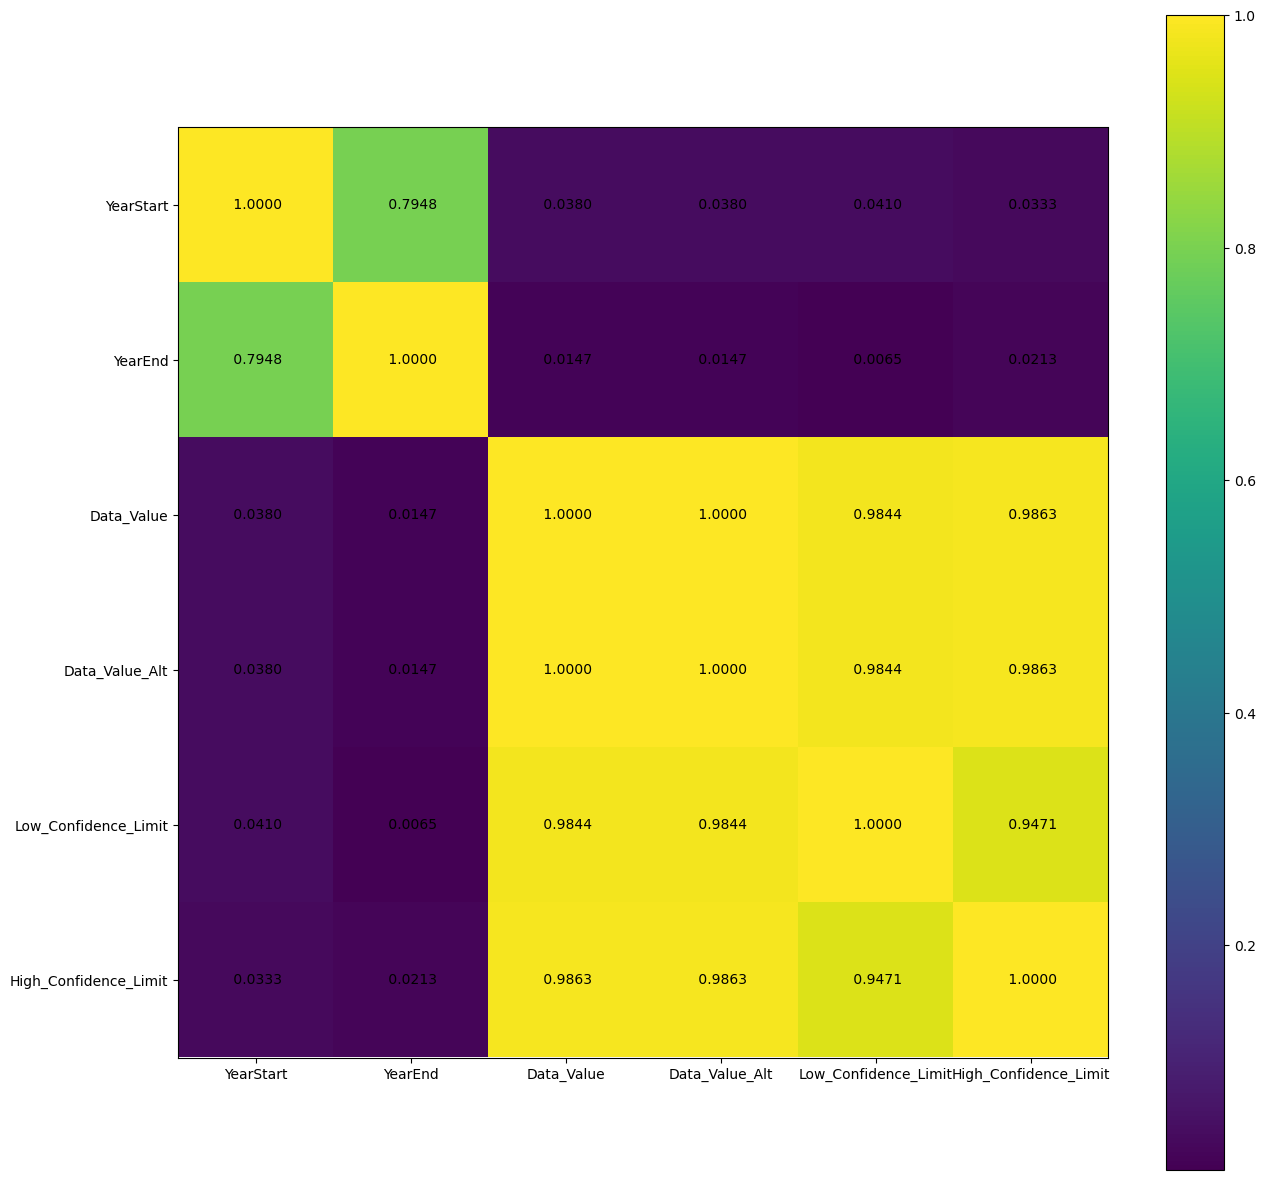

In [22]:
plt.figure(figsize=(15, 15))
plt.imshow(corr)
plt.colorbar()
plt.xticks(ticks=np.arange(0, 6),
           labels=['YearStart', 'YearEnd', 'Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit',
                   'High_Confidence_Limit'])
plt.yticks(ticks=np.arange(0, 6),
           labels=['YearStart', 'YearEnd', 'Data_Value', 'Data_Value_Alt', 'Low_Confidence_Limit',
                   'High_Confidence_Limit'])
for i in range(6):
    for j in range(6):
        #print(i,j,mt_zone.iloc[i,j])
        plt.text(j, i, f'{corr.iloc[i, j]: .4f}', ha='center', va='center')

相关性最高的属性几乎同时出现nan，因此很难相关性最高的属性来填补其缺失值，这里选择使用 YearStart 来填充 Data_Value 属性的缺失值

In [23]:
relation_pull = alzheimer_DataFrame.groupby('Data_Value').agg(avg=('YearStart', 'mean'))
relation_pull

,avg
Data_Value,
0.0,2017.636943
0.2,2017.000000
0.3,2016.000000
0.5,2015.000000
0.6,2017.000000
...,...
99.6,2016.500000
99.7,2018.000000
99.8,2017.500000


In [24]:
cleaned_data_by_correlation = copy.deepcopy(alzheimer_DataFrame.loc[:, ('YearStart', 'Data_Value')])
nan_mask = cleaned_data_by_correlation['Data_Value'].isna()
cleaned_data = cleaned_data_by_correlation[nan_mask].values
for i in range(len(cleaned_data)):
    print(f'\r{i}', end='')
    rate = cleaned_data_by_correlation[nan_mask]['YearStart'].iloc[i]
    dist = abs(relation_pull.loc[:, 'avg'] - rate)
    idx = np.argmin(dist)
    cleaned_data[i, 1] = relation_pull.index[idx]
cleaned_data_by_correlation[nan_mask] = cleaned_data

69832

In [25]:
print(alzheimer_DataFrame.loc[:, 'Data_Value'].value_counts())
print(cleaned_data_by_correlation.loc[:, 'Data_Value'].value_counts())
print(cleaned_data_by_correlation.loc[:, 'Data_Value'].value_counts() - alzheimer_DataFrame.loc[:, 'Data_Value'].value_counts())

Data_Value
6.0     473
6.3     467
6.1     459
5.8     458
5.2     456
       ... 
99.7      2
0.5       1
0.6       1
0.3       1
0.2       1
Name: count, Length: 999, dtype: int64
Data_Value
0.5      15921
100.0    12073
0.3      11223
98.4     10808
0.2      10134
         ...  
99.9         3
99.0         3
99.7         2
0.8          2
0.6          1
Name: count, Length: 999, dtype: int64
Data_Value
0.0          0
0.2      10133
0.3      11222
0.5      15920
0.6          0
         ...  
99.6         0
99.7         0
99.8         0
99.9         0
100.0    12054
Name: count, Length: 999, dtype: int64


可以增加的情况几乎完全随机，这是因为所选属性的关联不大，因此没有特别的规律

### 四、通过数据对象之间的相似性来填补缺失值

使用无缺失值的 YearStart, YearEnd 四个属性用于衡量数据对象之间的相似性，先将它们归一化

In [26]:
def min_max(x):
    return (x - x.min()) / (x.max() - x.min())

In [27]:
ref_attributes = ['YearStart', 'YearEnd']
standardized_data = copy.deepcopy(alzheimer_DataFrame)
for ref_attribute in ref_attributes:
    attr_data = standardized_data[ref_attribute]
    standardized_data[ref_attribute] = min_max(attr_data)
standardized_data.head(10)

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,...,Stratification2,Geolocation,ClassID,TopicID,QuestionID,LocationID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2
0,1.0,1.0,HI,Hawaii,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-157.8577494 21.30485044),C01,TOC11,Q43,15,AGE,5064,OVERALL,OVERALL
1,0.4,0.4,ID,Idaho,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C05,TMC03,Q27,16,AGE,5064,OVERALL,OVERALL
2,0.4,0.4,ID,Idaho,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,NaN,POINT (-114.36373 43.68263001),C01,TOC11,Q43,16,AGE,5064,OVERALL,OVERALL
3,0.6,0.6,ID,Idaho,BRFSS,Overall Health,Physically unhealthy days (mean number of days),Physically unhealthy days (mean number of days...,Number,MEAN,...,NaN,POINT (-114.36373 43.68263001),C01,TOC01,Q08,16,AGE,5064,OVERALL,OVERALL
4,1.0,1.0,IN,Indiana,BRFSS,Mental Health,Lifetime diagnosis of depression,Percentage of older adults with a lifetime dia...,%,PRCTG,...,Male,POINT (-86.14996019 39.76691045),C05,TMC03,Q27,18,AGE,AGE_OVERALL,GENDER,MALE
5,1.0,1.0,IA,Iowa,BRFSS,Overall Health,Prevalence of sufficient sleep,Percentage of older adults getting sufficient ...,%,PRCTG,...,NaN,POINT (-93.81649056 42.46940091),C01,TOC09,Q34,19,AGE,AGE_OVERALL,OVERALL,OVERALL
6,1.0,1.0,IA,Iowa,BRFSS,Overall Health,Fair or poor health among older adults with ar...,Fair or poor health among older adults with do...,%,PRCTG,...,NaN,POINT (-93.81649056 42.46940091),C01,TOC13,Q45,19,AGE,AGE_OVERALL,OVERALL,OVERALL
7,0.8,0.8,IA,Iowa,BRFSS,Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,PRCTG,...,NaN,POINT (-93.81649056 42.46940091),C05,TMC01,Q03,19,AGE,AGE_OVERALL,OVERALL,OVERALL
8,0.8,0.8,IA,Iowa,BRFSS,Overall Health,Arthritis among older adults,Percentage of older adults ever told they have...,%,PRCTG,...,Hispanic,POINT (-93.81649056 42.46940091),C01,TOC11,Q43,19,AGE,5064,RACE,HIS
9,0.6,0.6,IA,Iowa,BRFSS,Overall Health,Fall with injury within last year,Percentage of older adults who have fallen and...,%,PRCTG,...,NaN,POINT (-93.81649056 42.46940091),C01,TOC06,Q05,19,AGE,65PLUS,OVERALL,OVERALL


In [28]:
def clean_data_by_nearest_sample(attr, dataframe):
    feature_data = copy.deepcopy(dataframe.loc[:, (*ref_attributes, attr)])
    nan_mask = feature_data[attr].isna()
    not_nan = feature_data[~nan_mask].values
    no_nan_data = feature_data[~nan_mask].iloc[:, :2].values
    nan_data = feature_data[nan_mask].values
    nan_feature = feature_data[nan_mask].iloc[:, :2].values
    nan_data_len = nan_data.shape[0]

    for i in range(nan_data_len):
        print(f'\r{i}', end='')
        distance = np.sum(np.square(nan_feature[i] - no_nan_data), axis=-1)
        nearest_idx = np.argmin(distance)
        nan_data[i, 2] = not_nan[nearest_idx, 2]
    print('')
    feature_data[nan_mask] = nan_data
    return feature_data

In [29]:
commit_count_cleaned_data = clean_data_by_nearest_sample('Geolocation', standardized_data)
commit_count_cleaned_data.isna().sum()

23048


YearStart      0
YearEnd        0
Geolocation    0
dtype: int64

In [30]:
print(standardized_data.loc[:, 'Geolocation'].value_counts())
print(commit_count_cleaned_data.loc[:, 'Geolocation'].value_counts())
print(commit_count_cleaned_data.loc[:, 'Geolocation'].value_counts() - standardized_data.loc[:, 'Geolocation'].value_counts())

Geolocation
POINT (-120.1550313 44.56744942)    4565
POINT (-75.54397043 42.82700103)    4557
POINT (-111.5871306 39.36070017)    4222
POINT (-82.40426006 40.06021014)    3955
POINT (-83.62758035 32.83968109)    3951
POINT (-76.60926011 39.29058096)    3919
POINT (-157.8577494 21.30485044)    3907
POINT (-85.77449091 35.68094058)    3879
POINT (-84.71439027 44.66131954)    3796
POINT (-78.45789046 37.54268067)    3758
POINT (-81.92896054 28.93204038)    3753
POINT (-68.98503134 45.25422889)    3733
POINT (-99.42677021 31.82724041)    3699
POINT (-117.0718406 39.49324039)    3696
POINT (-77.036871 38.907192)        3684
POINT (-80.71264013 38.6655102)     3682
POINT (-89.53803082 32.7455101)     3677
POINT (-77.86070029 40.79373015)    3648
POINT (-106.240581 34.52088095)     3635
POINT (-86.63186076 32.84057112)    3633
POINT (-84.77497105 37.64597027)    3623
POINT (-147.722059 64.84507996)     3611
POINT (-81.04537121 33.9988213)     3592
POINT (-74.27369129 40.13057005)    3589
POIN